<h1>Clustering</h1>

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png>

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

Los siguientes datos simulados contienen observaciones que pertenecen a cuatro grupos distintos. 

Se pretende aplicar *K-means-clustering* con el objetivo de identificar las agrupaciones reales.

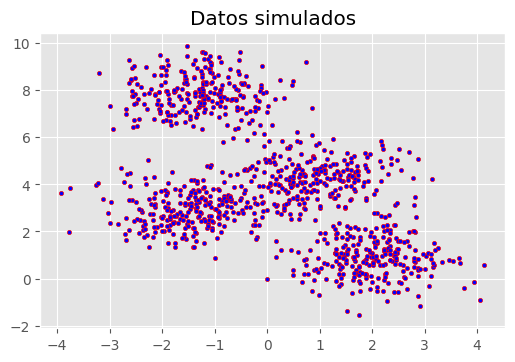

In [12]:
# Simulación de datos
X, y = make_blobs(
        n_samples    = 1000, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.80, 
        shuffle      = True, 
        random_state = 0
       )

# Gráfico
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'blue',
    marker    = '.',
    edgecolor = 'red', 
)
ax.set_title('Datos simulados');

Modelo *K-means*

Con la clase *sklearn.cluster.KMeans* de *Scikit-Learn* se pueden entrenar modelos de clustering utilizando el algoritmo *k-means*. Entre sus parámetros destacan:

- $n\_{clusters}$: determina el número $k$ de clusters que se van a generar.

- $init$: estrategia para asignar los centroides iniciales. Por defecto se emplea *k-means++*, una estrategia que trata de alejar los centroides lo máximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar *random*.

- $n\_init$: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre $10-25$, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.

- $max\_iter$: número máximo de iteraciones permitidas.

- $random\_state$: semilla para garantizar la reproducibilidad de los resultados.

In [13]:
# Escalado de datos
X_scaled = scale(X)

In [15]:
# Modelo
modelo_kmeans = KMeans(n_clusters=4,
                       n_init=25,
                       random_state=123)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=123)

El objeto devuelto por *KMeans()* contiene entre otros datos: la media de cada una de las variables para cada cluster (*cluster_centers_*), es decir, los centroides. Un vector indicando a qué cluster se ha asignado cada observación (*.labels_*) y la suma total de cuadrados internos de todos los clusters (*.inertia_*).

Número de clusters

Al tratarse de una simulación, se conoce el verdadero número de grupos ($4$) y a cuál de ellos pertenece cada observación. Esto no sucede en la mayoría de casos prácticos, pero es útil como ejemplo ilustrativo cómo funciona *k-means*.

In [16]:
# Clasificación con el modelo k-means
y_predict = modelo_kmeans.fit_predict(X=X_scaled)

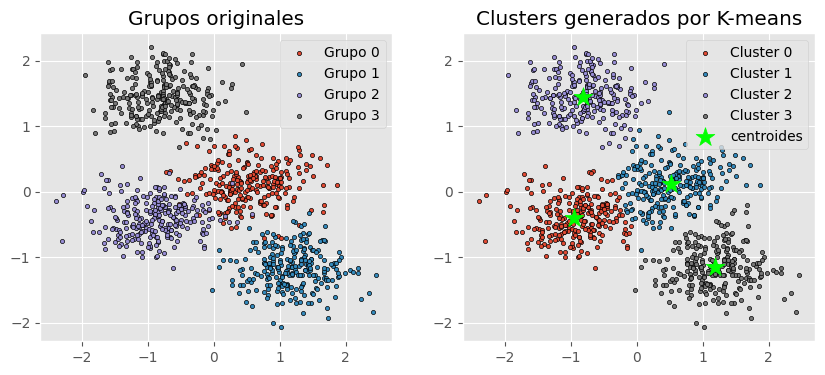

In [20]:
# Representación gráfica: grupos originales vs. clusters creados
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = '.',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Grupos originales')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = '.',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    s = 200,
    marker = '*',
    c = 'lime',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por K-means')
ax[1].legend();

Este tipo de visualización es muy útil e informativa, sin embargo, solo es posible cuando se trabaja con dos dimensiones. Si los datos contienen más de dos variables (dimensiones), una posible solución es utilizar las dos primeras componentes principales obtenidas con un *PCA* previo.

El número de aciertos y errores puede representarse en modo de matriz de confusión. A la hora de interpretar estas matrices, es importante recordar que el clustering asigna las observaciones a clusters cuyo identificador no tiene porqué coincidir con la nomenclatura empleada para los grupos reales. En este ejemplo, el grupo *1* se ha asignado al cluster *3*. Así pues, por cada fila de la matriz cabe esperar un valor alto (coincidencias) para una de las posiciones y valores bajos en las otras (errores de clasificación), pero no tienen por qué coincidir los nombres (diagonal).

In [24]:
# Matriz de confusión: grupos originales vs. clusters creados
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2,3
grupo_real,,,,
0,9,232,2,7
1,0,2,0,248
2,237,13,0,0
3,0,3,247,0


En este análisis, todas las observaciones se han clasificado correctamente. De nuevo repetir que, en la realidad, no se suelen conocer los verdaderos grupos en los que se dividen las observaciones, de lo contrario no se necesitaría aplicar clustering.

Supóngase ahora que se trata de un caso real, en el que se desconoce el número de grupos en los que se subdividen las observaciones. El analista tendría que probar con diferentes valores de $k$ y decidir cuál parece más razonable. A continuación, se muestran los resultados para $k=2$ y $k=6$.

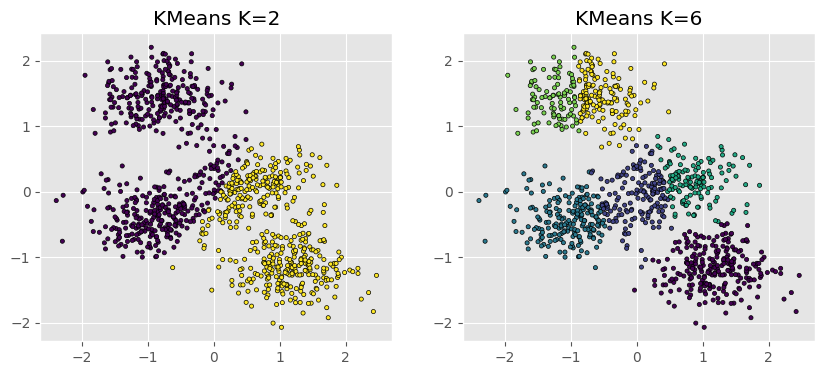

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = '.',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = '.',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

Al observar los resultados obtenidos para $k=2$, es intuitivo pensar que el grupo que se encuentra entorno a las coordenadas $x=0.5, y=0$ (mayoritariamente considerado como amarillo) debería ser un grupo separado. Para $k=6$ no parece muy razonable la separación de los grupos amarillo y azul. Este ejemplo muestra la principal limitación del método de $k-means$, el hecho de tener que escoger de antemano el número de clusters que se generan.

La deducción anterior solo puede hacerse visualmente cuando se trata de dos dimensiones. Una forma sencilla de estimar el número $k$ óptimo de clusters cuando no se dispone de esta información, es aplicar el algoritmo de $k-means$ para un rango de valores de $k$ e identificar aquel valor a partir del cual la reducción en la suma total de varianza intra-cluster ($inertia$) deja de ser sustancial. A esta estrategia se la conoce como **método del codo** o **elbow method**.

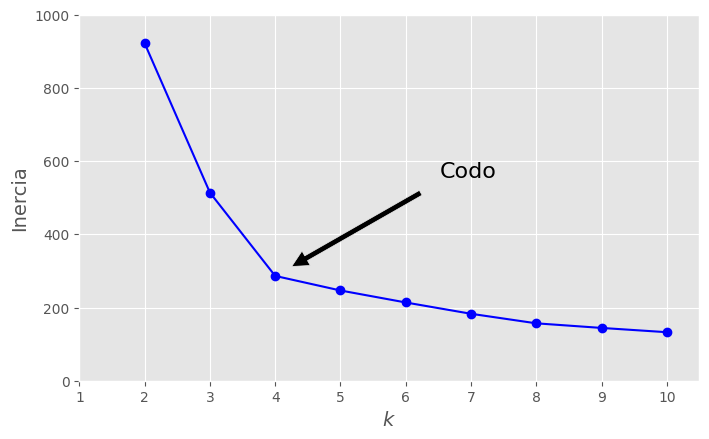

In [29]:
# definir ajuste K-medias
kmedias_k = [KMeans(n_clusters = k, 
                    random_state = 3,
                    n_init = 10).fit(X_scaled)
             for k in range(2, 11)]
inercias = [model.inertia_ for model in kmedias_k]

# pintar inercias
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 11), inercias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
             xy=(4, inercias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.axis([1, 10.5, 0, 1000])
plt.xticks(range(1,11));
#plt.grid()
plt.show()

A partir de $4$ clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que $k=4$ es una buena opción.

Fin